# VizDoom Basic Runnning

## Step 1: Installing VizDoom

In [5]:
pip install vizdoom ## free opensource library for running DOOM through python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 15.5/15.5 MB 540.7 kB/s eta 0:00:00
     -------------------------------------- 10.6/10.6 MB 522.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
!cd github

In [12]:
pip install git

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [28]:
!cd github & git clone https://github.com/Farama-Foundation/ViZDoom

Cloning into 'ViZDoom'...
Updating files:  53% (1110/2058)
Updating files:  54% (1112/2058)
Updating files:  55% (1132/2058)
Updating files:  56% (1153/2058)
Updating files:  57% (1174/2058)
Updating files:  58% (1194/2058)
Updating files:  59% (1215/2058)
Updating files:  60% (1235/2058)
Updating files:  61% (1256/2058)
Updating files:  62% (1276/2058)
Updating files:  63% (1297/2058)
Updating files:  64% (1318/2058)
Updating files:  65% (1338/2058)
Updating files:  66% (1359/2058)
Updating files:  67% (1379/2058)
Updating files:  68% (1400/2058)
Updating files:  69% (1421/2058)
Updating files:  70% (1441/2058)
Updating files:  71% (1462/2058)
Updating files:  72% (1482/2058)
Updating files:  73% (1503/2058)
Updating files:  74% (1523/2058)
Updating files:  75% (1544/2058)
Updating files:  76% (1565/2058)
Updating files:  77% (1585/2058)
Updating files:  78% (1606/2058)
Updating files:  79% (1626/2058)
Updating files:  80% (1647/2058)
Updating files:  81% (1667/2058)
Updating files:  

In [2]:
# Imports 
from vizdoom import * # every vizdoom dependancy
# for game model
import random
import time
import numpy as np

In [126]:
# GAME SETUP

game = DoomGame()
game.load_config('github/ViZDoom/scenarios/new_1deadly_corridor.cfg')
game.init()

In [12]:
# ACTIONS ARE MOVE_LEFT, MOVE_RIGHT, MOVE_FRONT, MOVE_BACK, TURN_LEFT, TURN_RIGHT, ATTACK

In [124]:
actions = np.identity(7, dtype = np.uint8)
# the identity matrix acts as actions

In [16]:
actions

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [56]:
# checking with random actions to simulate random events
random.choice(actions)

array([0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [58]:
game.new_episode()

In [90]:
game.make_action(random.choice(actions))

-0.088775634765625

In [88]:
state = game.get_state()

In [92]:
game.close()

In [96]:
# using random actions to visualise our environment
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        game.make_action(random.choice(actions))
        

In [122]:
# now setting up a basic reward function
episodes = 10
for episode in range(episodes):
    game.new_episode() # making new episode (new game)
    while not game.is_episode_finished(): # looping while the game is not finished
        state = game.get_state() # to assess current state of the game
        #stats about current state
        img = state.screen_buffer # gets the frame of the game
        info = state.game_variables # game variables -> 50 ammo
        # the 4 is passing no of frame skips so that the game sees the choice made
        reward = game.make_action(random.choice(actions), 4) # any random choice for the player
        
        # live reward function printing
        print("Reward: ", reward)
        time.sleep(.009)
    print("Reward result: ", game.get_total_reward())
    time.sleep(1)

Reward:  0.0
Reward:  0.0
Reward:  0.0
Reward:  0.8358306884765625
Reward:  1.0026397705078125
Reward:  6.090789794921875
Reward:  7.4091949462890625
Reward:  4.9975433349609375
Reward:  3.370819091796875
Reward:  8.00347900390625
Reward:  8.094879150390625
Reward:  5.4599761962890625
Reward:  3.6827239990234375
Reward:  2.4839630126953125
Reward:  1.6753997802734375
Reward:  1.1299896240234375
Reward:  0.7620697021484375
Reward:  -12.60052490234375
Reward:  -0.9346160888671875
Reward:  -0.6305084228515625
Reward:  -0.425384521484375
Reward:  1.1631317138671875
Reward:  0.095703125
Reward:  -0.697113037109375
Reward:  -0.4702911376953125
Reward:  -0.31732177734375
Reward:  -0.2141265869140625
Reward:  3.245513916015625
Reward:  3.45281982421875
Reward:  2.3289031982421875
Reward:  -2.7127685546875
Reward:  0.426849365234375
Reward:  -2.803680419921875
Reward:  -4.73492431640625
Reward:  0.44854736328125
Reward:  1.75701904296875
Reward:  -1.843170166015625
Reward:  -7.7213592529296875


KeyboardInterrupt: 

In [100]:
# the current config of rewards is not incentivising our agent to kill monsters
# only reward is reachig the end of the corridor, but that is not viable if we train on this bassic reward as it will learn to move forward
# thus we need to apply reward shaping to the config to make the agent learn better

In [113]:
# will use new variables DAMAGE_TAKEN (-ve reinforcement), HITCOUNT (+ve) and SELECTED_WEAPON_AMMO (-ve)
# updated in new_deadly_corridor

In [116]:
# we will also use curriculum learning, so starting with skill 1 and all the way to skill 5
# files stored as new_1deadly_corridor, new_2deadlycorridor etc 

In [128]:
game.get_state().game_variables

array([100.,   0.,   0.,  -1.])

In [130]:
# they map to HEALTH, DAMAGE_TAKEN, HITCOUNT, SELECTED_WEAPON_AMMO 

In [102]:
game.close()

# Setting up VizDoom on OpenAI Gym Environment

In [48]:
!pip install gym

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Imports from OpenAI Gym
from gymnasium import Env
#importing gym spaces
from gymnasium.spaces import Discrete, Box
import cv2

In [4]:
Discrete(3).sample() # using this we can randomly sample from the action space

0

In [12]:
actions[Discrete(3).sample()]

array([1, 0, 0], dtype=uint8)

In [14]:
Box(low=0, high=255, shape=(320,240), dtype = np.uint8).sample() # gives image

array([[193,  85,  60, ..., 222,  28,  10],
       [150, 177, 175, ...,  88, 153, 122],
       [137, 235, 176, ..., 169, 155, 161],
       ...,
       [151, 146,  69, ..., 138, 108, 134],
       [ 84,  89, 101, ..., 105,  96,   0],
       [250,  55, 102, ...,  27, 130,  57]], dtype=uint8)

### Defining Classes

In [6]:
import numpy as np
import cv2
from vizdoom import DoomGame
from gymnasium import Env
from gymnasium.spaces import Box, Discrete

In [45]:
class VizDoomGym(Env):    
    def __init__(self, render=False, config = 'github/ViZDoom/scenarios/new_1deadly_corridor.cfg'):
        super().__init__()
        self.game = DoomGame()
        # initially set config as the first and then we can change by directly passing 
        self.game.load_config(config)

        self.game.set_window_visible(render)
        self.game.init()

        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(7)
        
        # available_game_variables = { HEALTH DAMAGE_TAKEN HITCOUNT SELECTED_WEAPON_AMMO}
        self.damage_taken = 0
        self.hitcount = 0
        self.ammo = 52
        
    def step(self, action):
        actions = np.identity(7, dtype=np.uint8)
        movement_reward = self.game.make_action(actions[action], 4)

        reward = 0
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            
            # REWARD SHAPING:
            game_variables = self.game.get_state().game_variables
            health, damage_taken, hitcount, ammo = game_variables
            
            # calculate reward deltas
            damage_taken_delta = damage_taken - self.damage_taken
            self.damage_taken = damage_taken
            hitcount_delta = hitcount - self.hitcount
            self.hitcount = hitcount
            ammo_delta = ammo - self.ammo
            self.ammo = ammo
            
            reward = movement_reward + damage_taken_delta*10 + hitcount_delta*200 + ammo_delta*5
            info = {
                "ammo": ammo,
                "health": health,
                "damage_taken": damage_taken,
                "hitcount": hitcount
            }
            
        else:
            state = np.zeros(self.observation_space.shape, dtype=np.uint8)
            info = {}

        done = self.game.is_episode_finished()
        return state, reward, done, False, info  # False for 'truncated' (new Gymnasium API)

    def render(self):
        pass

    def reset(self, seed=None, options=None):
        
        # available_game_variables = { HEALTH DAMAGE_TAKEN HITCOUNT SELECTED_WEAPON_AMMO}
        self.damage_taken = 0
        self.hitcount = 0
        self.ammo = 52
        
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state), {}

    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
        return np.reshape(resize, (100, 160, 1))

    def close(self):
        self.game.close()

In [63]:
env = VizDoomGym() # without render

In [51]:
env = VizDoomGym(render = True)

In [34]:
env.observation_space.shape

(100, 160, 1)

In [157]:
state = env.reset()

In [98]:
env.close()

In [96]:
# importing env checker
from stable_baselines3.common import env_checker

In [55]:
env_checker.check_env(env) # if no output then env is working fine.

# Visualising State

In [59]:
from matplotlib import pyplot as plt

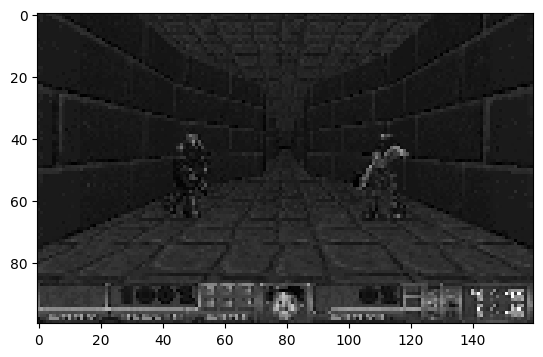

In [65]:
# Extract the state from the tuple
state, _ = env.reset()

# Since the image is already grayscale, no need to convert to RGB
plt.imshow(state.squeeze(), cmap='gray')  # Use .squeeze() to remove the extra channel dimension
plt.show()

# Making the Callback Function

In [14]:
#Installing pytorch
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.6.0-cp39-cp39-win_amd64.whl (204.1 MB)
     -------------------------------------- 203.0/203.0 MB 1.0 MB/s eta 0:00:00


In [268]:
# Installing Stable Baselines
!pip install stable-baselines3[extra]

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 15.8/15.8 MB 615.5 kB/s eta 0:00:00
  Using cached torch-2.6.0-cp39-cp39-win_amd64.whl (204.1 MB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\KIIT\\AppData\\Roaming\\Python\\Python39\\site-packages\\~-mpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Check the permissions.



In [84]:
# IMPORTING DEPENDANCIES
import os
import torch
from stable_baselines3.common.callbacks import BaseCallback

In [86]:
class TrainingLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose = 1):
        super(TrainingLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if (self.n_calls % self.check_freq == 0):
            model_path = os.path.join(self.save_path, 'model_{}'.format(self.n_calls))
            self.model.save(model_path)
        
        return True

In [88]:
Check_Dir = './train/train_corridor/'
Log_Dir = './logs/logs_corridor/'

In [90]:
callback = TrainingLoggingCallback(check_freq=10000, save_path=Check_Dir)

# Training Model Using Curriculum

In [10]:
!pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable


In [75]:
import tensorboard
print(tensorboard.__version__)

2.18.0


In [72]:
# Using PPO algorithm
from stable_baselines3 import PPO

In [100]:
env = VizDoomGym(config = 'github/ViZDoom/scenarios/new_1deadly_corridor.cfg') 

In [108]:
# model = PPO('CnnPolicy', env, tensorboard_log=Log_Dir, verbose = 1, learning_rate=0.0002, n_steps = 4096)
# Cnn because image, tensorboard log goes to the log directory, verbose to give info while training
# n_steps is the batch size
model = PPO('CnnPolicy', env, tensorboard_log=Log_Dir, verbose = 1, learning_rate = 0.00001, n_steps = 8192, clip_range = .1, gamma = .95, gae_lambda = .9)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=4000000, callback=callback)

Logging to ./logs/logs_corridor/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 173      |
|    ep_rew_mean     | 120      |
| time/              |          |
|    fps             | 28       |
|    iterations      | 1        |
|    time_elapsed    | 286      |
|    total_timesteps | 8192     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 171          |
|    ep_rew_mean          | 124          |
| time/                   |              |
|    fps                  | 22           |
|    iterations           | 2            |
|    time_elapsed         | 744          |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0029366156 |
|    clip_fraction        | 0.172        |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.94        |
|    explained_varia

In [ ]:
print("Training Done")

# Testing Trained Model

In [21]:
# Using stable baselines to evaluate model through builtin evaluation function
from stable_baselines3.common.evaluation import evaluate_policy 

In [23]:
model = PPO.load('./train/train_defend/model_120000.zip')

In [25]:
env = VizDoomGym(render = True)

In [58]:
env.close()

In [27]:
mean_reward,_ = evaluate_policy(model, env, n_eval_episodes=500)

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


KeyboardInterrupt: 

In [60]:
mean_reward

14.666